#### Chapter 1 - Python Basics for Data Analysis

In [ ]:
%%HTML
<style>
td,th {
font-size: 15px    
}
</style>

##### Python Syntax and Data Types 

In [2]:
def analyze_data(dataset):
    for item in dataset:
        if item > 0:
            print("Posistive value found")
        else:
            print("Non-positive value found")

In [ ]:
import numpy as np
import pandas as pd

# Create a NumPy array
data = np.array([1, 2, 3, 4, 5])

# Creatig pandas series
series = pd.Series(data, name="Values")

# Creating a pandas DataFrame
df = pd.DataFrame(
    {
        "ID": [1, 2, 3, 4, 5],
        "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
        "Score": [95.5, 87.2, 91.8, 76.9, 88.3],
    }
)

print(df.dtypes)

##### Control Structures and Functions

In [8]:
import pandas as pd
from pathlib import Path

# Define the correct path to the CSV file
csv_file_path = Path("/home/charles/github/repos/data-way/data/sales_data.csv")

# Check if the file exists
if not csv_file_path.exists():
    print(f"File not found: {csv_file_path}")
else:
    # Load the dataset
    df = pd.read_csv(csv_file_path, sep=",")

    # Conditional statement to categorize sales
    def categorize_sale(amount):
        if amount < 100:
            return "Low"
        elif 100 <= amount < 1000:
            return "Medium"
        else:
            return "High"

    # Apply the categorization to the dataset
    df["SaleCategory"] = df["SaleAmount"].apply(categorize_sale)

    # Loop through the dataset to calculate total sales by category
    category_totals = {"Low": 0, "Medium": 0, "High": 0}

    for index, row in df.iterrows():
        category_totals[row["SaleCategory"]] += row["SaleAmount"]

    print(category_totals)

{'Low': 125, 'Medium': 2700, 'High': 3200}


Let's repeat the last code using 'match' statement to evaluate the subject which is the value after the match keyword and checks it against patterns.

In [10]:
import pandas as pd
from pathlib import Path

# Define the correct path to the CSV file
csv_file_path = Path("/home/charles/github/repos/data-way/data/sales_data.csv")

# Check if the file exists
if not csv_file_path.exists():
    print(f"File not found: {csv_file_path}")
else:
    # Load the dataset
    df = pd.read_csv(csv_file_path, sep=",")

    # Match statement to categorize sales
    def categorize_sale(amount: int) -> str:
        match amount:
            case amount if amount < 100:
                return "Low"
            case amount if 100 <= amount < 1000:
                return "Medium"
            case _:
                return "High"

    # Apply the categorization to the dataset
    df["SaleCategory"] = df["SaleAmount"].apply(categorize_sale)

    # Loop through the dataset to calculate total sales by category
    category_totals = {"Low": 0, "Medium": 0, "High": 0}

    for index, row in df.iterrows():
        category_totals[row["SaleCategory"]] += row["SaleAmount"]

    print(category_totals)

{'Low': 125, 'Medium': 2700, 'High': 3200}


Data loaded successfully.
        Date  SaleAmount
0 2023-01-15         500
1 2023-01-22         750
2 2023-02-05         300
3 2023-02-18         950
4 2023-03-01        1200


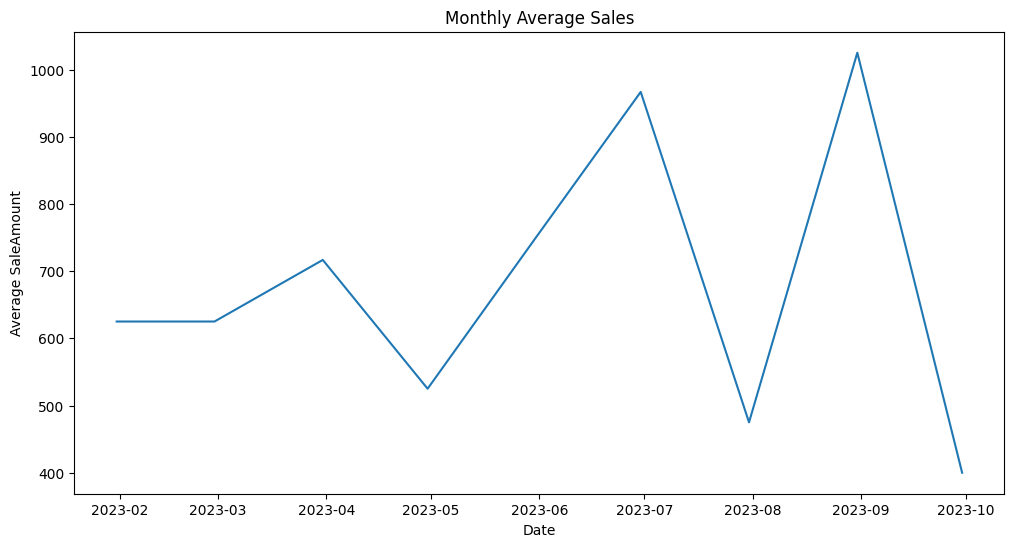

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Ensure %matplotlib inline is in the first cell
%matplotlib inline

# Define the correct path to the CSV file
file_path = Path("/home/charles/github/repos/data-way/data/sales_data_1.csv")


def load_and_clean_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully.")
        df.dropna(inplace=True)
        df["Date"] = pd.to_datetime(df["Date"])
        print(df.head())  # Check the first few rows
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None


def calculate_monthly_average(df, column_name):
    return df.resample("ME", on="Date")[column_name].mean()


def plot_monthly_trend(df, column_name, title):
    try:
        monthly_avg = calculate_monthly_average(df, column_name)
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_avg.index, monthly_avg.values)
        plt.title(title)
        plt.xlabel("Date")
        plt.ylabel("Average " + column_name)
        plt.show()
    except Exception as e:
        print(f"Error plotting data: {e}")


# Usage
sales_data = load_and_clean_data(file_path)
if sales_data is not None:
    plot_monthly_trend(sales_data, "SaleAmount", "Monthly Average Sales")